# **Session 14: Grid Search for Tuning Hyperparameters **


## PY599 (Fall 2018): Applied Artificial Intelligence
## NC State University
###Dr. Behnam Kia
### https://appliedai.wordpress.ncsu.edu/


**Disclaimer**: Please note that these codes are simplified version of the algorithms, and they may not give the best, or expected performance that you could possibly get from these algorithms. The aim of this notebook is to help you understand the basics and the essence of these algorithms, and experiment with them. These basic codes are not deployment-ready or free-of-errors for real-world applications. To learn more about these algorithms please refer to text books that specifically study these algorithms, or contact me. - Behnam Kia


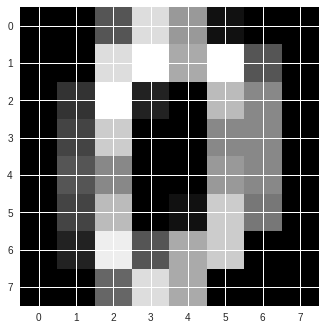

0
the best score is 0.9453846153846154
the best parameter value that resulted in the best performance is 0.007742636826811277
the performance over test dats is 0.937625754527163


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm  # we are imporitng the famous Support Vector Machine
import matplotlib.pyplot as plt 


digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

plt.gray() 
plt.imshow(digits.images[0]) 
plt.show()
print(digits.target[0])





svc = svm.SVC(kernel='linear')

from sklearn.model_selection import GridSearchCV, cross_val_score

Cs = np.logspace(-6, -1, 10)   # this is the Grid over different C values. 
                               # See http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html for more info on SVC and what parameter C is

param_grid=dict(C=Cs)  
clf = GridSearchCV(estimator=svc, param_grid=param_grid)    #this is where we setup the grid search.
           
clf.fit(X_digits[:1300], y_digits[:1300])        #this is the main code, where we fit the model to the training data for different grid points!

print("the best score is %s"%clf.best_score_)  
print("the best parameter value that resulted in the best performance is %s"%clf.best_estimator_.C)  
print("the performance over test dats is %s"%clf.score(X_digits[1300:], y_digits[1300:]) ) 

# Prediction performance on test set is not as good as on train set


## Instead of gridsearch, which exhaustively tries every combination of listed hyperparameters, random search randomly explores the hyperparmater space in order to find (near) optimal values for hyperparameters.
see: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html